### Generate data

In [ ]:
import numpy as np
from mlscratch.utils import train_test_split

x = np.linspace(-3, 3)
sigma = 0.1
noise = np.random.normal(0, sigma, size = x.size)
y_noisy = np.sin(x) + noise
y = np.sin(x)

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy)

### Train models

In [43]:
%load_ext autoreload
%autoreload 2

from mlscratch.decision_tree_regressor import DecisionTreeRegressor
max_depths = [1, 5, 10]
models = []
preds = []
for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth = max_depth)
    model.fit(x_train, y_train)
    models.append(model)
    preds.append(model.predict(x_test))

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    print(f'------ Model with max_depth {max_depth} -----')
    print(f'The score on training data is {train_score}')
    print(f'The score on test data is {test_score}')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
------ Model with max_depth 1 -----
The score on training data is 0.8237691104560549
The score on test data is 0.7520325863115135
------ Model with max_depth 5 -----
The score on training data is 0.992424299836751
The score on test data is 0.9656263358738535
------ Model with max_depth 10 -----
The score on training data is 1.0
The score on test data is 0.9673035685092916


### Plot

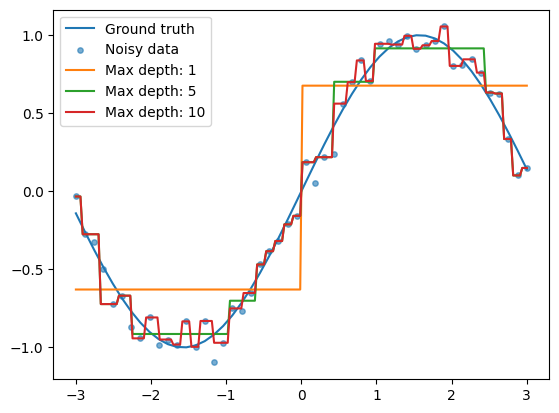

In [44]:
from matplotlib import pylab as plt

plt.figure()
plt.plot(x, y, label = 'Ground truth')
# Scatter the noisy training data
plt.scatter(x, y_noisy, s=15, alpha=0.6, label="Noisy data")
# plt.plot(x, y_noisy)
x_new = np.linspace(-3, 3, 200)
for i, model in enumerate(models):
    pred = model.predict(x_new)
    plt.plot(x_new, pred, label = f'Max depth: {max_depths[i]}')
plt.legend()